In [44]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np

In [45]:
import matplotlib.pyplot as plt
from IPython.display import display
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

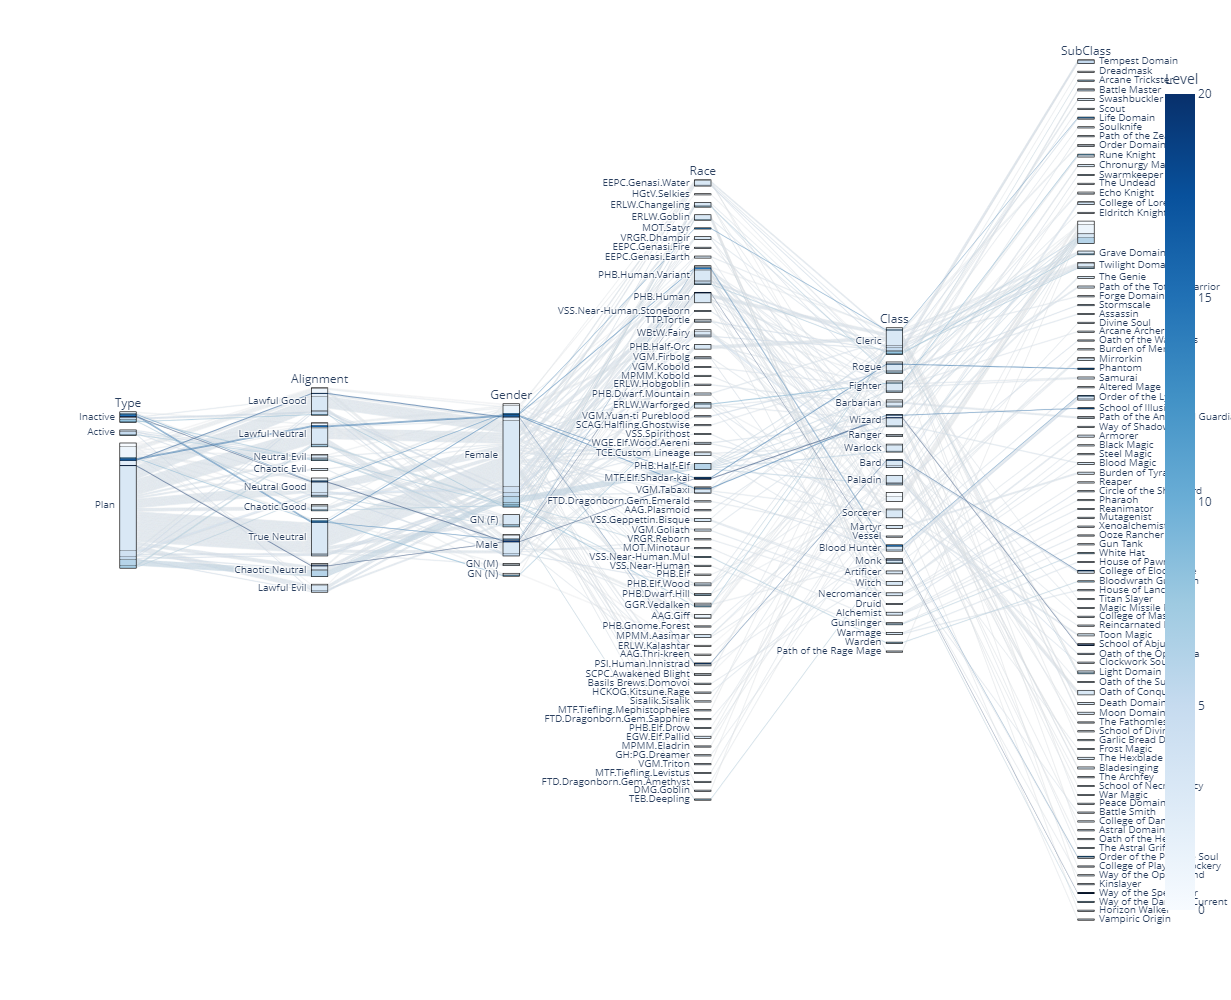

In [59]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)      

def Cla_Spilt(cs0):
    cs1 = cs0.split(":")
    cs2 = cs1[0].split(".")
    
    S1=""
    S2=""
    S3=0
    
    try:
      S1 = cs2[1].strip()
    except:
      S1 = ""
    
    try:
      S2 = cs2[2].strip()
    except:
      S2 = ""
    
    try:
      S3 = int(cs1[1].strip())
    except:
      S3 = 0
    
    return [S1,S2,S3]
    

Table_Character = pd.read_csv('/home/jovyan/Data/Characters.csv')
Col = ['ID','Name','Type','Alignment','Gender','Race','Class','SubClass','Level']
Col2 = ['ID','Name','Type','Alignment','Gender','Race','Class Breakdown']

Data = []
for x1, y1 in Table_Character.iterrows():
    Ro = [y1['ID'],y1['Name'],y1['Type'],y1['Alignment'],y1['Gender'],y1['Race']]
    CB = y1['Class Breakdown']
    if "," in CB:
        x = CB.split(",")
        for y in x:
            st = Cla_Spilt(y)
            arr1 = array(Ro)
            arr3 = np.concatenate((arr2, st))
            Data.append(arr3)
    else:
        arr2 = array(Ro)
        st = Cla_Spilt(CB)
        arr3 = np.concatenate((arr2, st))
        Data.append(arr3)

Data.insert(0, Col)
df = pd.DataFrame(Data)      
df.columns = df.iloc[0]
df = df[1:]

df.to_csv('/home/jovyan/Data/Para_Class.csv', index=False) #<<<<<<<
PCT = pd.read_csv('/home/jovyan/Data/Para_Class.csv')

#dimensions=['ID','Name','Type','Alignment','Gender','Race','Class','SubClass', 'Level']
fig = px.parallel_categories(PCT,
                             dimensions=['Type','Alignment','Gender','Race','Class','SubClass'],
                             color="Level", color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(height=1000)
fig.show()